In [2]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 12.7 MB/s 
     |████████████████████████████████| 186 kB 45.6 MB/s 
     |████████████████████████████████| 1.2 MB 34.1 MB/s 
     |████████████████████████████████| 46 kB 4.4 MB/s 
     |████████████████████████████████| 56 kB 4.1 MB/s 
     |████████████████████████████████| 51 kB 312 kB/s 
Mounted at /content/gdrive


In [5]:
from fastbook import *
from fastai.vision.widgets import *

In [4]:
from fastai.tabular.all import *

path = untar_data(URLs.ADULT_SAMPLE)


In [5]:
from fastai.tabular.all import *

path = untar_data(URLs.ADULT_SAMPLE)
dls = TabularDataLoaders.from_csv(path/"adult.csv", path=path, y_names="salary", cat_names=['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])
learn = tabular_learner(dls, metrics=accuracy)
learn.fine_tune(3)

KeyboardInterrupt: ignored

In [ ]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.378201,0.373804,0.831388,00:05
1,0.357113,0.354285,0.835842,00:05
2,0.351375,0.351169,0.839066,00:05


In [6]:

key = os.environ.get('AZURE_SEARCH_KEY', 'APIKEY')

In [7]:
results = search_images_bing(key, "grizzly bear")
img = results.attrgot('contentUrl')
len(img)
img

(#150) ['http://2.bp.blogspot.com/-NjMTuklENdE/UHzVv_8dIxI/AAAAAAAAA-U/tNBsQDn8kFI/s1600/Grizzly+Bear+Pic.jpg','https://wallsdesk.com/wp-content/uploads/2017/01/Grizzly-Bear-Background-.jpg','https://eskipaper.com/images/grizzly-bear-pictures-9.jpg','https://i2.wp.com/nypost.com/wp-content/uploads/sites/2/2020/09/grizzly-bear-89.jpg?quality=90&strip=all&ssl=1','http://tetonvalleylodge.com/wp-content/uploads/2015/04/grizzly-bear-idaho.jpg','https://bozone.com/site/wp-content/uploads/2019/03/GRIZZLY.jpeg','https://www.pbs.org/wnet/nature/files/2018/07/Bear133.jpg','https://jooinn.com/images/grizzly-bears-3.jpg','https://media.spokesman.com/photos/2017/11/30/Yellowstone_Grizzlies.JPG.jpg','https://www.conservationnw.org/wp-content/uploads/2017/10/grizzly-bears-1280x950.jpg'...]

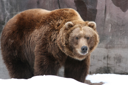

In [8]:
dest = 'images/grizzly.jpg'
download_url(img[0], dest)

im = Image.open(dest)
im.to_thumb(128, 128)

In [9]:
 bear_types = 'grizzly', 'black', 'teddy'
 path = Path('bears')

In [10]:
if not path.exists():
  path.mkdir()
  for o in bear_types:
    dest = (path/o)
    dest.mkdir(exist_ok = True)
    results = search_images_bing(key,f'{o} bear')
    download_images(dest, urls=results.attrgot('contentUrl'))

In [11]:
fns = get_image_files(path)
fns

(#422) [Path('bears/grizzly/00000083.jpeg'),Path('bears/grizzly/00000146.jpg'),Path('bears/grizzly/00000117.jpg'),Path('bears/grizzly/00000059.jpg'),Path('bears/grizzly/00000135.jpg'),Path('bears/grizzly/00000111.jpg'),Path('bears/grizzly/00000097.png'),Path('bears/grizzly/00000098.jpg'),Path('bears/grizzly/00000057.jpg'),Path('bears/grizzly/00000043.jpg')...]

In [12]:
failed = verify_images(fns)
failed.map(Path.unlink)

(#7) [None,None,None,None,None,None,None]

In [13]:
bears = DataBlock(blocks=(ImageBlock, CategoryBlock), get_items=get_image_files, 
                  splitter=RandomSplitter(valid_pct=0.2, seed=42), 
                  get_y=parent_label, item_tfms=Resize(128))

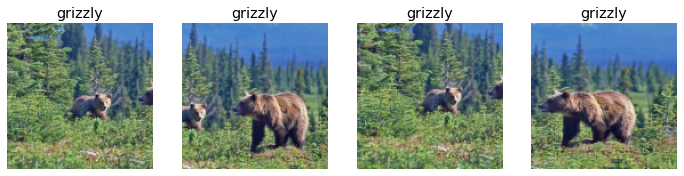

In [14]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1023: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  /pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:760.)
  ret = func(*args, **kwargs)


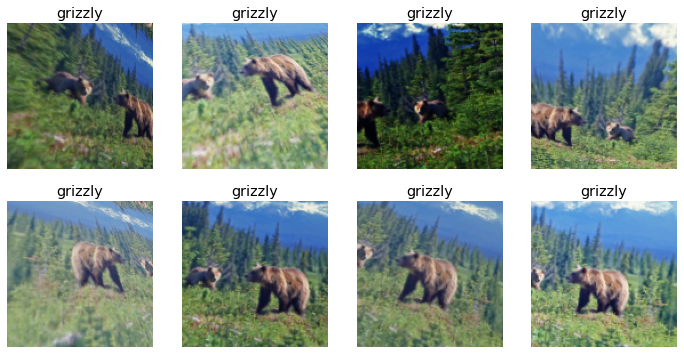

In [15]:
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [16]:
bears = bears.new(item_tfms=RandomResizedCrop(224,min_scale=0.5), batch_tfms=aug_transforms())
dls = bears.dataloaders(path)
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


epoch,train_loss,valid_loss,error_rate,time
0,1.020573,0.119329,0.048193,00:25


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


epoch,train_loss,valid_loss,error_rate,time
0,0.214470,0.160472,0.072289,00:26
1,0.158303,0.151001,0.060241,00:26
2,0.134656,0.128682,0.060241,00:25
3,0.109667,0.123351,0.060241,00:26


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency e

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


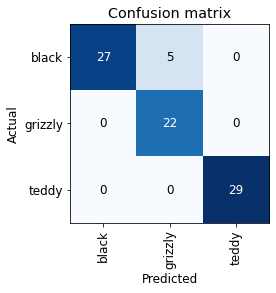

In [17]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

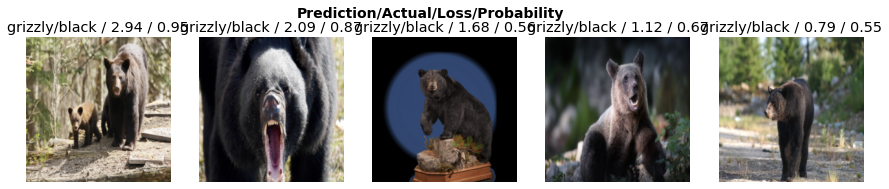

In [18]:
interp.plot_top_losses(5, nrows=1)

In [19]:
cleaner = ImageClassifierCleaner(learn)
cleaner

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [20]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

In [21]:
for idx, cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [22]:
learn.export()

In [25]:
from google.colab import files
files.download('export.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [21]:
path = Path()
path.ls(file_exts=".pkl")

(#1) [Path('export.pkl')]

In [22]:
learn_inf = load_learner(path/'export.pkl')

In [23]:
learn_inf.predict("images/grizzly.jpg")

('grizzly', tensor(1), tensor([6.2691e-07, 1.0000e+00, 1.7596e-07]))

In [24]:
learn_inf.dls.vocab

['black', 'grizzly', 'teddy']

In [43]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [44]:
img = PILImage.create(btn_upload.data[-1])

IndexError: ignored

In [45]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [46]:
pred, pred_idx, probs = learn_inf.predict(img)
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction {pred}; Probability {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction grizzly; Probability 0.9999')

In [47]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [48]:
def on_click_classify(change):
  img = PILImage.create(btn_upload.data[-1])
  btn_upload.data = []
  out_pl.clear_output()
  with out_pl: display(img.to_thumb(128,128))
  pred, pred_idx, probs = learn_inf.predict(img)
  lbl_pred.value = f'Prediction {pred}; Probability {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [49]:
VBox([widgets.Label('Select your bear!'), btn_upload, btn_run, out_pl, lbl_pred])